# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Importing the dataset

In [2]:
df = pd.read_csv("drug_data.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data type and checking null in dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


####  From the results above, there are no missing/null value in this dataset 

# Exploratory Data Analysis

### Defining a function to define numerical and categorical columns.

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 200
Variables: 6
cat_cols: 4
num_cols: 2
cat_but_car: 0
num_but_cat: 0


In [7]:
print("Categorical Columns are: ", cat_cols)
print("Numerical Columns are: ", num_cols)

Categorical Columns are:  ['Sex', 'BP', 'Cholesterol', 'Drug']
Numerical Columns are:  ['Age', 'Na_to_K']


### Defining a function to analyze categorical columns.

In [8]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

### Distribution of values in categorical columns

   Sex  Ratio
M  104   52.0
F   96   48.0


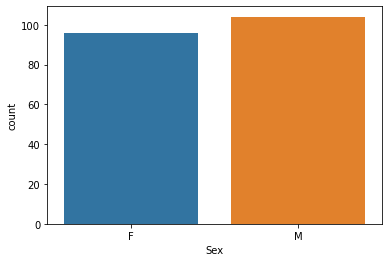

        BP  Ratio
HIGH    77   38.5
LOW     64   32.0
NORMAL  59   29.5


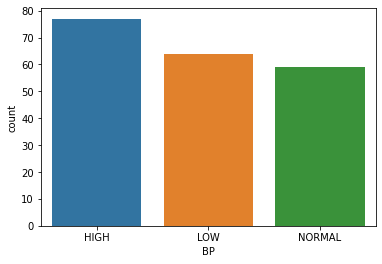

        Cholesterol  Ratio
HIGH            103   51.5
NORMAL           97   48.5


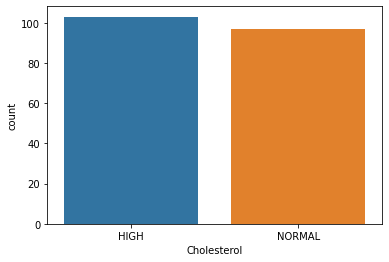

       Drug  Ratio
drugY    91   45.5
drugX    54   27.0
drugA    23   11.5
drugC    16    8.0
drugB    16    8.0


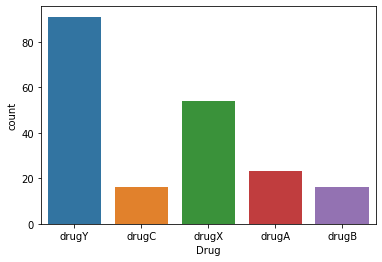

In [9]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

### Defining a function to analyze numerical columns.

In [10]:
def num_summary(dataframe, numerical_col, plot=False):
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [11]:
df[num_cols].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,95%,99%,max
Age,200.0,44.315000,16.544315,15.000,18.95000,22.0000,31.0000,45.0000,58.00,70.1000,74.00000,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,7.79615,8.9444,10.4455,13.9365,19.38,30.6239,35.65449,38.247


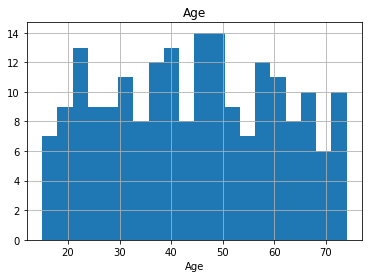

Skewness:  0.03030835703000607


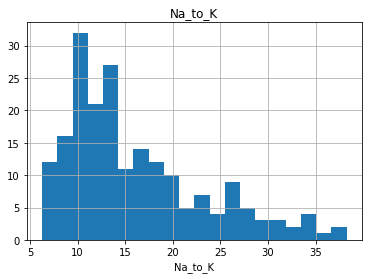

Skewness:  1.039341186028881


In [12]:
for col in num_cols:
    num_summary(df, col, plot=True)
    skewness = df[col].skew(axis = 0, skipna = True)
    print("Skewness: ", skewness)

#### - The distribution of 'Age' column is symetric, since the skewness value between -0.5 and 0.5

#### - The distribution of 'Na_to_K' column is moderately skewed, since the skewness value is between 0.5 and 1. It can also be seen from the histogram for 'Na_to_K' column

### Gender Distribution based on Drug Type

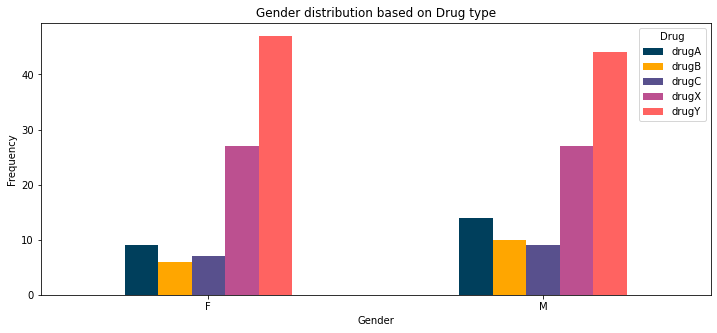

In [13]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Sodium to Potassium Distribution based on Gender and Age

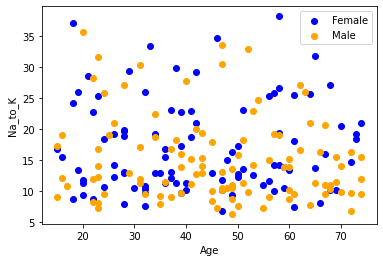

In [14]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# Dataset Preperation

### The age will be divided into 7 age categories:

#### Below 20
#### 20 - 29
#### 30 - 39
#### 40 - 49
#### 50 - 59
#### 60 - 69
#### Above

In [15]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

### The chemical ratio will be divided into 4 categories:

#### Below 10
#### 10 - 20
#### 20 - 30
#### Above 30

In [16]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

# Splitting the dataset into train and test

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Engineering

#### One-hot encoding

In [19]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#### Taking a look our final data

In [20]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [21]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


####  As can be seen, the distribution of drug type are now balanced.

# Naive-Bayes

## Categorical NB

In [22]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

Naive Bayes accuracy is: 81.67%


### Plotting Confusion Matrix

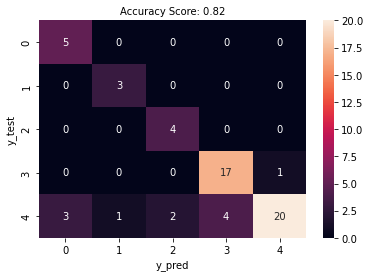

In [23]:
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.rcParams["figure.figsize"] = (15,10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

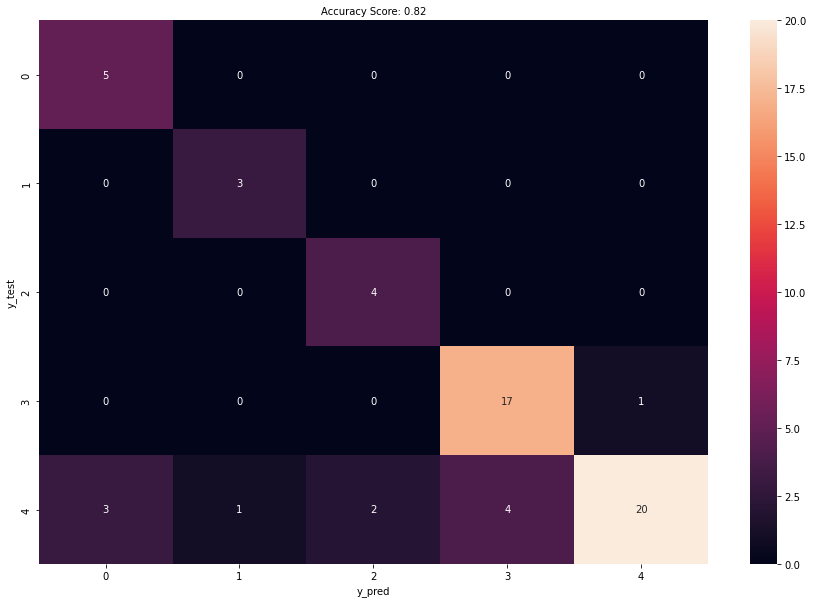

In [24]:
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.rcParams["figure.figsize"] = (15,10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

### ROC AUC Score

In [25]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [26]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.937473608263082


## Gaussian NB

In [27]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
Gaussian Naive Bayes accuracy is: 85.00%


In [28]:
print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.951514012303486


### Plotting Confusion Matrix

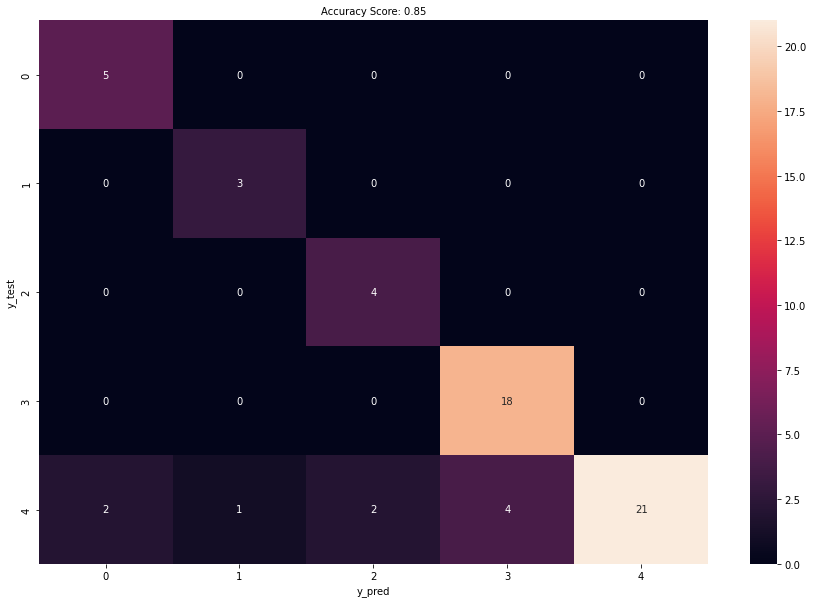

In [29]:
plot_confusion_matrix(y_test, y_pred)